In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/train.csv')

Exploratory data Analysis (EDA)

In [3]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
df.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [5]:
df.shape

(333, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.2 KB


In [7]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [8]:
df.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.corr()['medv']

ID        -0.221694
crim      -0.407454
zn         0.344842
indus     -0.473932
chas       0.204390
nox       -0.413054
rm         0.689598
age       -0.358888
dis        0.249422
rad       -0.352251
tax       -0.448078
ptratio   -0.481376
black      0.336660
lstat     -0.738600
medv       1.000000
Name: medv, dtype: float64

Features Exploration

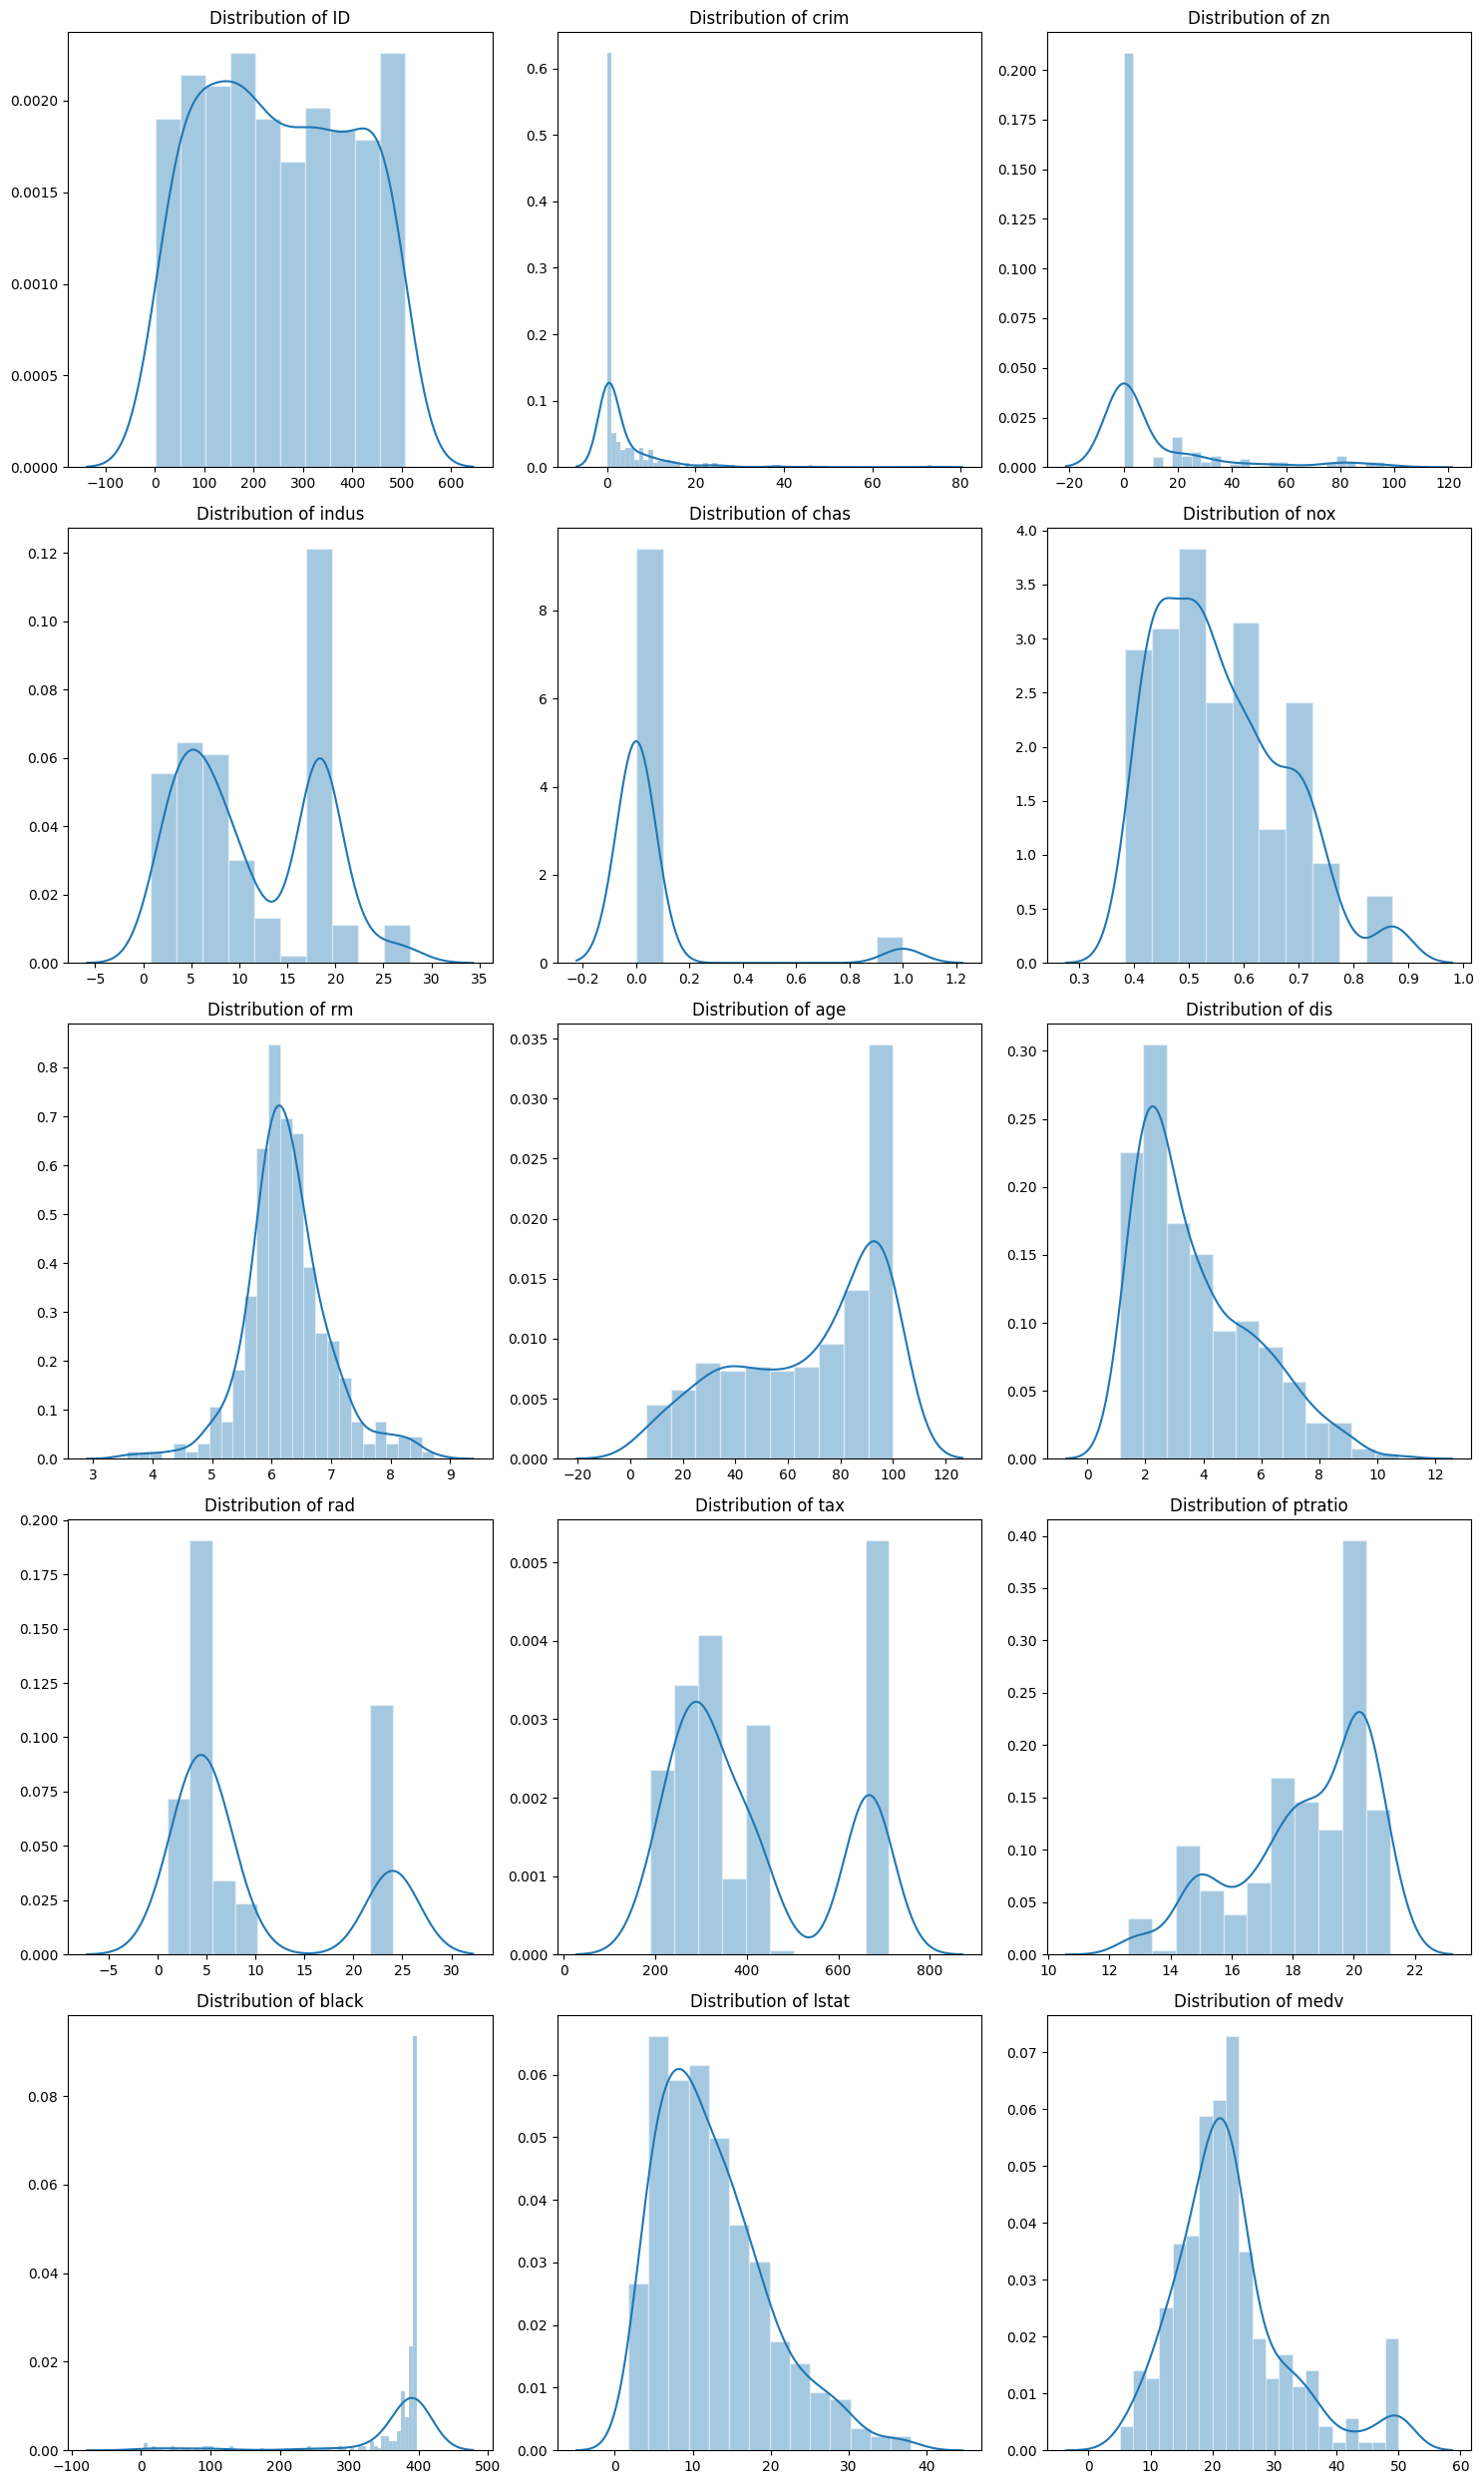

In [11]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

num_cols = 3
num_features = len(numerical_features)
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], 
                 kde=True, 
                 kde_kws=dict(cut=3),
                 stat="density", 
                 alpha=.4, 
                 edgecolor=(1, 1, 1, .4),
                 ax=axes[i],)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('') 
    axes[i].set_ylabel('')  

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Target Analysis

In [12]:
df['medv'].describe()

count    333.000000
mean      22.768769
std        9.173468
min        5.000000
25%       17.400000
50%       21.600000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

<Axes: xlabel='medv', ylabel='Density'>

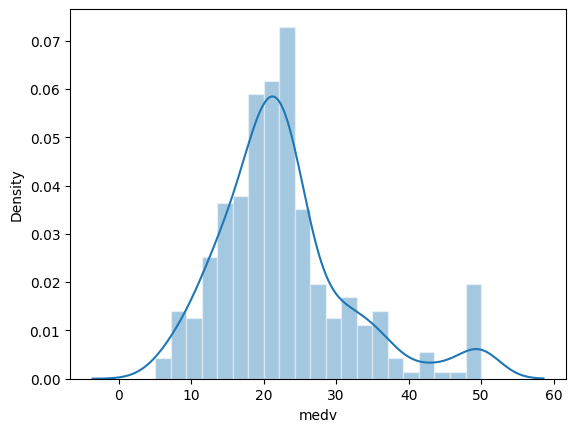

In [13]:
sns.histplot(df['medv'], kde=True, kde_kws=dict(cut=3),
             stat="density", alpha=.4, edgecolor=(1, 1, 1, .4))

Data Preprocessing

In [14]:
df.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [15]:
df = df.drop(columns='ID')

In [16]:
df.corr()['medv']

crim      -0.407454
zn         0.344842
indus     -0.473932
chas       0.204390
nox       -0.413054
rm         0.689598
age       -0.358888
dis        0.249422
rad       -0.352251
tax       -0.448078
ptratio   -0.481376
black      0.336660
lstat     -0.738600
medv       1.000000
Name: medv, dtype: float64

In [17]:
X = df.drop(columns='medv')
y = df['medv']

Splitting Data

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

Scaling Features

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_absolute_error

In [21]:
# List to store the model names and their metrics
results = []

In [22]:
# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print('Linear Regression:')
print('R2 score', r2_lr)
print('MAE', mae_lr)

results.append(['Linear Regression', 'lr', mae_lr, r2_lr])

Linear Regression:
R2 score 0.871546773012251
MAE 3.301620665478888


In [23]:
# Ridge Regression
ridge = Ridge(alpha=.5, tol=.01)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print('\nRidge Regression:')
print('R2 score', r2_ridge)
print('MAE', mae_ridge)

results.append(['Ridge Regression', 'ridge', mae_ridge, r2_ridge])


Ridge Regression:
R2 score 0.8716358777017138
MAE 3.2984756489582083


In [24]:
# Lasso Regression
lasso = Lasso(alpha=.01, tol=.03)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print('\nLasso Regression:')
print('R2 score', r2_lasso)
print('MAE', mae_lasso)

results.append(['Lasso Regression', 'lasso', mae_lasso, r2_lasso])


Lasso Regression:
R2 score 0.8719553022516503
MAE 3.293603741687927


In [25]:
# SVM
svr = SVR(kernel='poly', C=15, epsilon=.01)
svr.fit(X_train, y_train)
y_pred_svm = svr.predict(X_test)

mae_svm = mean_absolute_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print('\nSVM:')
print('R2 score', r2_svm)
print('MAE', mae_svm)

results.append(['SVM', 'svr', mae_svm, r2_svm])


SVM:
R2 score 0.6812182395833899
MAE 3.960368725065038


In [26]:
# KNN
knn = KNeighborsRegressor(n_neighbors=25)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print('\nKNN:')
print('R2 score', r2_knn)
print('MAE', mae_knn)

results.append(['KNN', 'knn', mae_knn, r2_knn])


KNN:
R2 score 0.7547953708248051
MAE 3.856235294117647


In [27]:
# Decision Tree
dtr = DecisionTreeRegressor(max_depth=80)
dtr.fit(X_train, y_train)
y_pred_dt = dtr.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print('\nDecision Tree:')
print('R2 score', r2_dt)
print('MAE', mae_dt)

results.append(['Decision Tree', 'dtr', mae_dt, r2_dt])


Decision Tree:
R2 score 0.8757345180143989
MAE 3.0588235294117645


In [28]:
# Random Forest
rfr = RandomForestRegressor(n_estimators=100,
                            max_depth=15,
                            criterion='absolute_error',
                            min_samples_split=10)
rfr.fit(X_train, y_train)
y_pred_rf = rfr.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('\nRandom Forest:')
print('R2 score', r2_rf)
print('MAE', mae_rf)

results.append(['Random Forest', 'rfr', mae_rf, r2_rf])


Random Forest:
R2 score 0.9603230383491417
MAE 1.8027058823529403


In [29]:
# ExtraTrees
etr = ExtraTreesRegressor(n_estimators=200, max_depth=12, criterion='absolute_error', bootstrap=False)
etr.fit(X_train, y_train)
y_pred_et = etr.predict(X_test)

mae_et = mean_absolute_error(y_test, y_pred_et)
r2_et = r2_score(y_test, y_pred_et)

print('\nExtraTrees:')
print('R2 score', r2_et)
print('MAE', mae_et)

results.append(['ExtraTrees', 'etr', mae_et, r2_et])


ExtraTrees:
R2 score 0.9586305318009264
MAE 1.8494338235294123


In [30]:
# AdaBoost
abr = AdaBoostRegressor(n_estimators=100, learning_rate=.1)
abr.fit(X_train, y_train)
y_pred_ab = abr.predict(X_test)

mae_ab = mean_absolute_error(y_test, y_pred_ab)
r2_ab = r2_score(y_test, y_pred_ab)

print('\nAdaBoost:')
print('R2 score', r2_ab)
print('MAE', mae_ab)

results.append(['AdaBoost', 'abr', mae_ab, r2_ab])


AdaBoost:
R2 score 0.9151658501294653
MAE 2.6801494149117935


In [31]:
# Gradient Boost
gbr = GradientBoostingRegressor(n_estimators= 200, learning_rate= 0.1, loss= 'huber', max_depth= 3, subsample= 0.9)
gbr.fit(X_train, y_train)
y_pred_gb = gbr.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print('\nGradient Boosting:')
print('R2 score', r2_gb)
print('MAE', mae_gb)

results.append(['Gradient Boosting', 'gbr', mae_gb, r2_gb])


Gradient Boosting:
R2 score 0.9701918394900337
MAE 1.5630452682086886


In [32]:
# XgBoost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print('\nXGBoost:')
print('R2 score', r2_xgb)
print('MAE', mae_xgb)

results.append(['XGBoost', 'xgb', mae_xgb, r2_xgb])


XGBoost:
R2 score 0.9607354026418714
MAE 1.7689241100760067


In [33]:
# MLP Regressor
mlp = MLPRegressor(hidden_layer_sizes=[128,64,32,4], learning_rate='invscaling', learning_rate_init=.1)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print('\nMLP Regressor:')
print('R2 score', r2_mlp)
print('MAE', mae_mlp)

results.append(['MLP Regressor', 'mlp', mae_mlp, r2_mlp])


MLP Regressor:
R2 score -0.02099792453044169
MAE 7.852941176470588


C:\Users\Lenovo pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Name', 'Model', 'MAE', 'R2 Score'])

# Display the DataFrame
print('\nAll Models Metrics:')
print(results_df.sort_values(by='R2 Score', ascending=False))


All Models Metrics:
                 Name  Model       MAE  R2 Score
9   Gradient Boosting    gbr  1.563045  0.970192
10            XGBoost    xgb  1.768924  0.960735
6       Random Forest    rfr  1.802706  0.960323
7          ExtraTrees    etr  1.849434  0.958631
8            AdaBoost    abr  2.680149  0.915166
5       Decision Tree    dtr  3.058824  0.875735
2    Lasso Regression  lasso  3.293604  0.871955
1    Ridge Regression  ridge  3.298476  0.871636
0   Linear Regression     lr  3.301621  0.871547
4                 KNN    knn  3.856235  0.754795
3                 SVM    svr  3.960369  0.681218
11      MLP Regressor    mlp  7.852941 -0.020998


## Improving Models

GridSearchCV

In [35]:
# Define the parameter grid for ExtraTrees
param_grid_etr = {
    'n_estimators': [50, 100, 200],
    'max_depth': [12, 13, 14],
    'criterion': ['absolute_error', 'poisson', 'squared_error'],
    'bootstrap': [False, True]
}

grid_search_etr = GridSearchCV(ExtraTreesRegressor(), param_grid_etr, cv=4, scoring='neg_mean_absolute_error')
grid_search_etr.fit(X_train, y_train)

print(f"Best parameters for ExtraTrees: ", grid_search_etr.best_params_)
print(f"Best score for ExtraTrees: ", -grid_search_etr.best_score_)

best_etr = grid_search_etr.best_estimator_
y_pred_best_etr = best_etr.predict(X_test)

mae_best_etr = mean_absolute_error(y_test, y_pred_best_etr)
r2_best_etr = r2_score(y_test, y_pred_best_etr)

print('\nBest ExtraTrees after Grid Search:')
print('R2 score', r2_best_etr)
print('MAE', mae_best_etr)

Best parameters for ExtraTrees:  {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 13, 'n_estimators': 200}
Best score for ExtraTrees:  2.1809905630630633

Best ExtraTrees after Grid Search:
R2 score 0.9608418284851965
MAE 1.7898823529411725


In [36]:
# Define the parameter grid for Gradient Boosting
param_grid_gbr = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.12, 0.13, 0.14],
    'subsample': [0.8, 0.9, 1.0],
    'loss': ['absolute_error', 'squared_error', 'huber']
}

grid_search_gbr = GridSearchCV(GradientBoostingRegressor(), param_grid_gbr, cv=4, scoring='neg_mean_absolute_error')
grid_search_gbr.fit(X_train, y_train)

print(f"Best parameters for Gradient Boosting: ", grid_search_gbr.best_params_)
print(f"Best score for Gradient Boosting: ", -grid_search_gbr.best_score_)

best_gbr = grid_search_gbr.best_estimator_
y_pred_best_gbr = best_gbr.predict(X_test)

mae_best_gbr = mean_absolute_error(y_test, y_pred_best_gbr)
r2_best_gbr = r2_score(y_test, y_pred_best_gbr)

print('\nBest Gradient Boosting after Grid Search:')
print('R2 score:', r2_best_gbr)
print('MAE:', mae_best_gbr)

Best parameters for Gradient Boosting:  {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
Best score for Gradient Boosting:  2.15002419400438

Best Gradient Boosting after Grid Search:
R2 score: 0.9568124927780041
MAE: 1.8502059571778875


In [37]:
# Define the parameter grid for RandomForest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [12, 13, 14, 15],
    'criterion': ['absolute_error', 'poisson'],
}

grid_search_rf = GridSearchCV(rfr, param_grid_rf, cv=4, scoring='neg_mean_absolute_error')
grid_search_rf.fit(X_train, y_train)

print(f"Best parameters for RandomForest: ", grid_search_rf.best_params_)
print(f"Best score for RandomForest: ", -grid_search_rf.best_score_)

best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print('\nBest RandomForest after Grid Search:')
print('R2 score:', r2_best_rf)
print('MAE:', mae_best_rf)

Best parameters for RandomForest:  {'criterion': 'poisson', 'max_depth': 14, 'n_estimators': 100}
Best score for RandomForest:  2.463358970244199

Best RandomForest after Grid Search:
R2 score: 0.9447061949186314
MAE: 1.9835906851564449


Voting Regressor

In [38]:
model_voting = VotingRegressor(estimators=[
    ('gbr', gbr), 
    ('xgb', xgb),
    ('etr', etr), 
    ('rfr', rfr)],
    weights=[4,4,3,3])
model_voting.fit(X_train, y_train)
y_pred_voting = model_voting.predict(X_test)

mae_voting = mean_absolute_error(y_test, y_pred_voting)
r2_voting = r2_score(y_test, y_pred_voting)

print('\nVoting Regressor:')
print('R2 score', r2_voting)
print('MAE', mae_voting)


Voting Regressor:
R2 score 0.972078633140337
MAE 1.4812712991923163


Stacking Regressor

In [41]:
model_stack = StackingRegressor([
    ('gbr', gbr), 
    ('xgb', xgb), 
    ('etr', etr), 
    ('rfr', rfr)], 
    final_estimator=lr)
model_stack.fit(X_train, y_train)
y_pred_stack = model_stack.predict(X_test)

mae_stack = mean_absolute_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print('\nStacking Regressor:')
print('R2 score', r2_stack)
print('MAE', mae_stack)


Stacking Regressor:
R2 score 0.973884830429665
MAE 1.406313933871143


In [42]:
import joblib

joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model_stack, 'model_stack.pkl')

['model_stack.pkl']